# In this notebook, I will practice the following skills:
    * text cleansing, including stem / lem

In [147]:
import pandas as pd
import numpy as np

import re
from bs4 import BeautifulSoup
import string

import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./data/IMDB_Dataset.csv')

In [123]:
def text_cleansing(text):
    '''
    INPUT: (STRING)
    OUTPUT: (STINRG)
    
    Description:
    The following process is executed to a given text.
    (Ref)
    
    1. Remove html tags
    2. Remove punctuations
    3. half/full
    lower case
    4. stopwords
    5. stem/lem
    
    
    '''
    # remove html tags
    # ref: https://towardsdatascience.com/nlp-for-beginners-cleaning-preprocessing-text-data-ae8e306bef0f
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text()
    
    # remove punctuations
    # https://medium.com/@dobko_m/nlp-text-data-cleaning-and-preprocessing-ea3ffe0406c1
    puncs = string.punctuation
    text = re.sub('[' + str(puncs) + ']', '', text)
    
    # lower case
    text = text.lower()
    
    # remove stopwords & Lemmatization (stem words is difficult to understand so not processed here)
    # ref: https://medium.com/@dobko_m/nlp-text-data-cleaning-and-preprocessing-ea3ffe0406c1
    # ref: https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
    word_list = text.split() 
    filtered_words = [word for word in word_list if word not in stopwords.words('english')]
    lem = WordNetLemmatizer()
    lemmatized_words_v = [lem.lemmatize(word, "v") for word in filtered_words]  # ref: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
    lemmatized_words_vn = [lem.lemmatize(word, "n") for word in lemmatized_words_v] 
    text = ' '.join(lemmatized_words_vn)

    return text

In [116]:
# check
text_cleansing('reviewers studies studying study wanted want wanna code go went gone better good connection connect connected connecting flies fly')

'reviewers study study study want want wanna code go go go better good connection connect connect connect fly fly'

In [124]:
text = df['review'].iloc[0]

In [132]:
tokenized_word=word_tokenize(text_cleansing(text))
print(tokenized_word)

['one', 'reviewer', 'mention', 'watch', '1', 'oz', 'episode', 'youll', 'hook', 'right', 'exactly', 'happen', 'methe', 'first', 'thing', 'strike', 'oz', 'brutality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'call', 'oz', 'nickname', 'give', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', 'moreso', 'scuffle', 'death', 'star', 'dodgy', 'deal', 'shady', 'agreement', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience', 'forget', 'charm', 'for

fdist = <FreqDist with 139 samples and 168 outcomes>


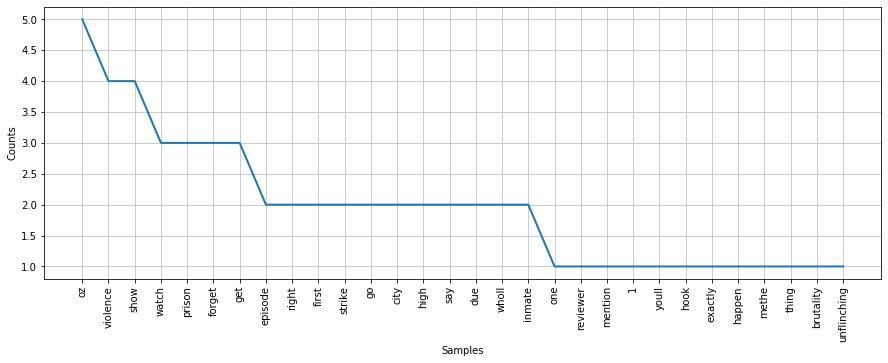

In [151]:
# Distribution Plot
# Ref: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
fdist = FreqDist(tokenized_word)
print('fdist = {}'.format(fdist))

# Frequency Distribution Plot
plt.figure(figsize=(15, 5)) # figureの縦横の大きさ
fdist.plot(30,cumulative=False)
plt.show()